In [1]:
import numpy as np
import pdb
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

mu = [[7.0,-1.0],[3.0,-1.5],[5.5,1.0]]
sigma = 0.7

x1 = np.random.normal(mu[0][0],sigma,100)
y1 = np.random.normal(mu[0][1],sigma,100)

x2 = np.random.normal(mu[1][0],sigma,100)
y2 = np.random.normal(mu[1][1],sigma,100)

x3 = np.random.normal(mu[2][0],sigma,100)
y3 = np.random.normal(mu[2][1],sigma,100)

In [2]:
def problem_a():
    plt.scatter(x1, y1, color = 'y', alpha = 0.5)
    plt.scatter(x2, y2, color = 'g', alpha = 0.5)
    plt.scatter(x3, y3, color = 'b', alpha = 0.5)
    plt.show()

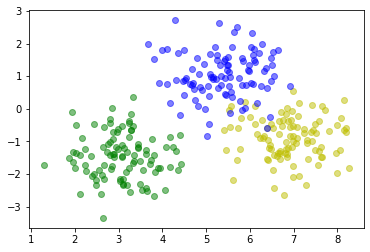

In [3]:
problem_a()

In [4]:
def distance(a,b):
    return ((a*a) + (b*b)) ** 0.5

In [5]:
def kmeans(datas, k):
    count = 0
    centroids_x = np.random.uniform(min(datas[0]), max(datas[0]), k).tolist()
    centroids_y = np.random.uniform(min(datas[1]), max(datas[1]), k).tolist()
    centroids_x_old = []
    centroids_y_old = []
    new_Xs = []
    new_Ys = []
    diss = []
    error = 0
    errors = []
    while True:
        if centroids_x_old == centroids_x and centroids_y_old == centroids_y:
            break
        new_Xs.clear()
        new_Ys.clear()
        for _ in range(k):
            new_Xs.append([])
            new_Ys.append([])
        for i in range(300):
            for j in range(k):
                diss.append(distance(centroids_x[j] - datas[0][i], centroids_y[j] - datas[1][i]))
            new_Xs[np.argmin(diss)].append(datas[0][i])
            new_Ys[np.argmin(diss)].append(datas[1][i])
            error += min(diss)
            diss.clear()
        errors.append(error)
        centroids_x_old = centroids_x.copy()
        centroids_y_old = centroids_y.copy()
        centroids_x.clear()
        centroids_y.clear()
        for i in range(k):
            sum_x = 0
            sum_y = 0
            for x in new_Xs[i]:
                sum_x += x
            for y in new_Ys[i]:
                sum_y += y
            centroids_x.append(sum_x/len(new_Xs[i]))
            centroids_y.append(sum_y/len(new_Ys[i]))
        error = 0
        count += 1
            
    for i in range(k):
        plt.scatter(new_Xs[i], new_Ys[i], alpha = 0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(centroids_x, centroids_y, color = 'r', marker='x')
    plt.show()
    
    iteration = list(range(count+1))
    del iteration[0]
    plt.xlabel('training iteration')
    plt.ylabel('distortion')
    plt.plot(iteration, errors)
    plt.show()


In [6]:
def problem_b():
    datas = []
    X = list(x1)
    X.extend(list(x2))
    X.extend(list(x3))
    datas.append(X)

    Y = list(y1)
    Y.extend(list(y2))
    Y.extend(list(y3))
    datas.append(Y)

    print('k=2')
    kmeans(datas, 2)
    print('k=3')
    kmeans(datas, 3)
    print('k=4')
    kmeans(datas, 4)
    print('k=6')
    kmeans(datas, 6)

k=2


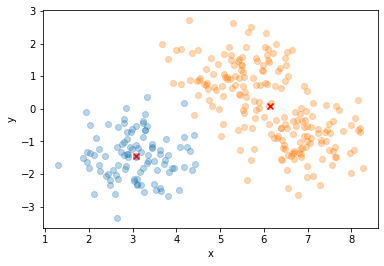

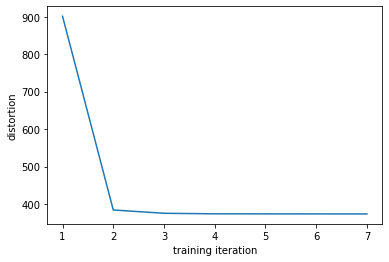

k=3


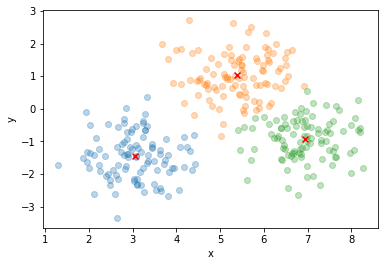

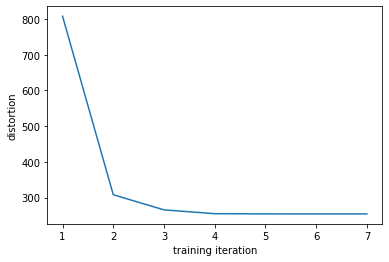

k=4


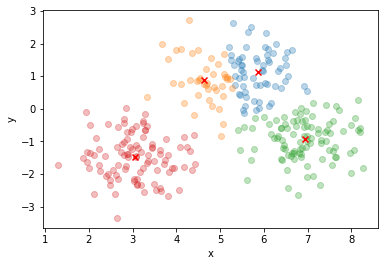

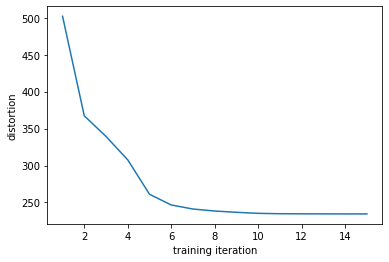

k=6


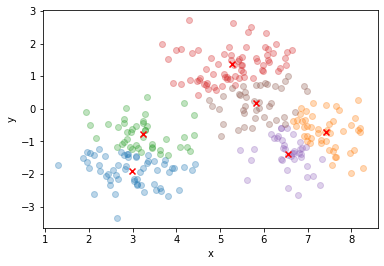

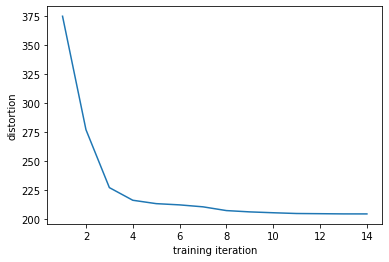

In [7]:
problem_b()

In [8]:
import pandas as pd
from sklearn.mixture import GaussianMixture

In [9]:
def GMM(k, arr_datas, clusterDF):
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm_label = gmm.fit(arr_datas).predict(arr_datas)
    clusterDF['gmm_label'] = gmm_label

    unique_labels = np.unique(clusterDF['gmm_label'].values)

    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label']==label]
        plt.scatter(x=label_cluster['x'], y=label_cluster['y'], alpha = 0.3)
        
        mu_x = sum(label_cluster['x'])/len(label_cluster['x'])
        mu_y = sum(label_cluster['y'])/len(label_cluster['y'])
        plt.scatter(mu_x, mu_y, marker='x', color = 'r')
        
    plt.show()

In [10]:
def problem_c():
    datas = []
    X = list(x1)
    X.extend(list(x2))
    X.extend(list(x3))
    datas.append(X)

    Y = list(y1)
    Y.extend(list(y2))
    Y.extend(list(y3))
    datas.append(Y)
    
    arr_datas = np.array(datas).T
    clusterDF = pd.DataFrame(data=arr_datas, columns=['x', 'y'])
    
    print('k=2')
    GMM(2, arr_datas, clusterDF)
    print('k=3')
    GMM(3, arr_datas, clusterDF)
    print('k=4')
    GMM(4, arr_datas, clusterDF)
    print('k=6')
    GMM(6, arr_datas, clusterDF)

k=2


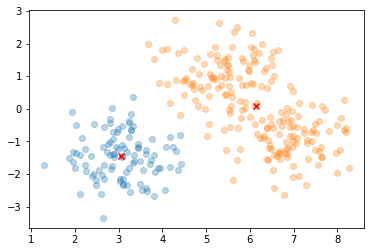

k=3


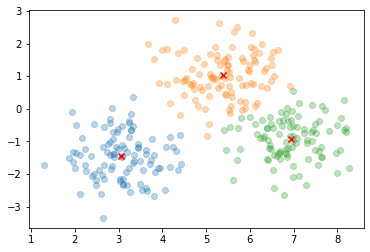

k=4


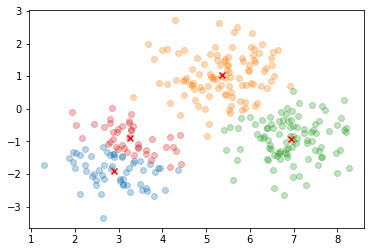

k=6


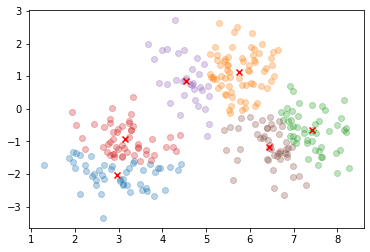

In [11]:
problem_c()